# ohmic Boson version
This file is the input file of spin-spin bath. According to Nancy and ... the bath corrlation of this tyoe of bath can be recast as:
$$
  C(t) \equiv \langle \hat{F}(t) \hat{F}(0) \rangle_{\mathrm{B}} = \frac{1}{\pi} \int_{- \infty}^{+\infty} d \omega \frac{e^{- i \omega t} J(\omega) }{1 - e^{- \beta \omega}}.
$$
We often use the Ohmic form specturm function , 
$$
  J(\omega) = \frac{\pi}{2} \alpha \omega e^{ - \omega / \omega_c}.
$$
Note the distribution function is fermion type.

In [4]:
import math
from cvxopt import solvers, matrix, spmatrix, mul
from scipy import sparse


def fit_J(w, res, expn, etal):
    for i in range(len(etal)):
        res += etal[i] / (expn[i] - 1.j * w)
    return res


def fit_t(t, res, expn, etal):
    for i in range(len(etal)):
        res += etal[i] * np.exp(-expn[i] * t)
    return res


def numpy_to_cvxopt_matrix(A):
    if A is None:
        return A
    if sparse.issparse(A):
        if isinstance(A, sparse.spmatrix):
            return scipy_sparse_to_spmatrix(A)
        else:
            return A
    else:
        if isinstance(A, np.ndarray):
            if A.ndim == 1:
                return matrix(A, (A.shape[0], 1), 'd')
            else:
                return matrix(A, A.shape, 'd')
        else:
            return A

(-100.0, 100.0)

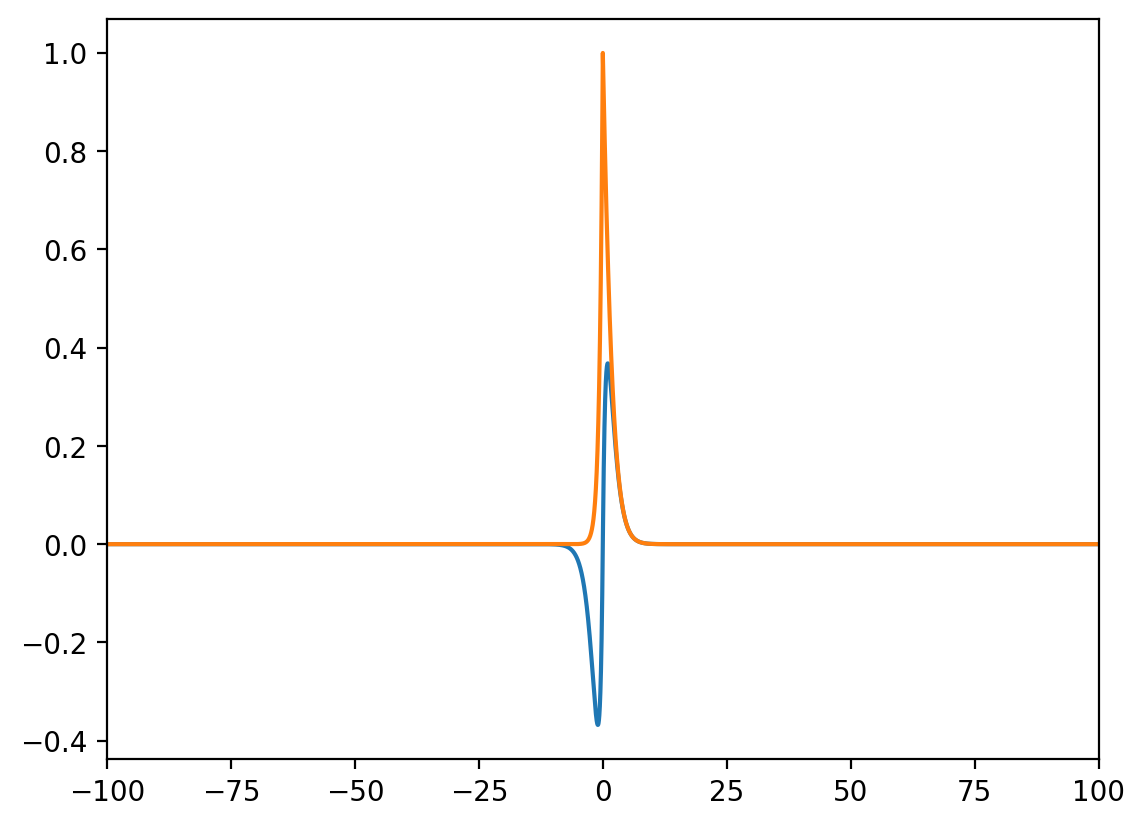

In [7]:
gams1 = 1
lams1 = 1

beta = 1

def gen_jw(w):
    return w * lams1 * np.exp(- gams1 * np.abs(w))

len_ = 100000
spe_wid = 100
w = np.linspace(-spe_wid, spe_wid, len_)

sigma = 1
jw = gen_jw(w)
jw1 = jw  / (1 - np.exp(- beta * w))
plt.plot(w, jw)
plt.plot(w, jw1)
plt.xlim(-100, 100)

In [48]:
n = 2000
scale = 200

n_fft = 1000000
scale_fft = 2000

n_rate = (scale_fft * scale/ (4 * n))
print(n_rate)
n_rate = int(n_rate)

w = np.linspace(0, scale_fft * np.pi, n_fft + 1)[:-1]
dw = w[1] - w[0]

jw = gen_jw(w)
cw1 = jw / (1 - np.exp(-beta * w))
cw2 = jw / (1 - np.exp(+beta * w))
del jw

cw1[0] = cw1[1] / 2
cw2[0] = cw2[1] / 2
fft_ct = (np.fft.fft(cw1) * dw - np.fft.ifft(cw2) * len(cw2) * dw) / np.pi
fft_t = 2 * np.pi * np.fft.fftfreq(len(cw1), dw)
# del cw1, cw2

fft_ct = fft_ct[(scale>=fft_t) & (fft_t >= 0)][::n_rate]
fft_t = fft_t[(scale>=fft_t) & (fft_t >= 0)][::n_rate]

t = fft_t
res_t = np.zeros(len(t), dtype=complex)

50.0


/tmp/ipykernel_60179/89117679.py:15: RuntimeWarning: invalid value encountered in true_divide
  cw1 = jw / (1 - np.exp(-beta * w))
/tmp/ipykernel_60179/89117679.py:16: RuntimeWarning: overflow encountered in exp
  cw2 = jw / (1 - np.exp(+beta * w))
/tmp/ipykernel_60179/89117679.py:16: RuntimeWarning: invalid value encountered in true_divide
  cw2 = jw / (1 - np.exp(+beta * w))


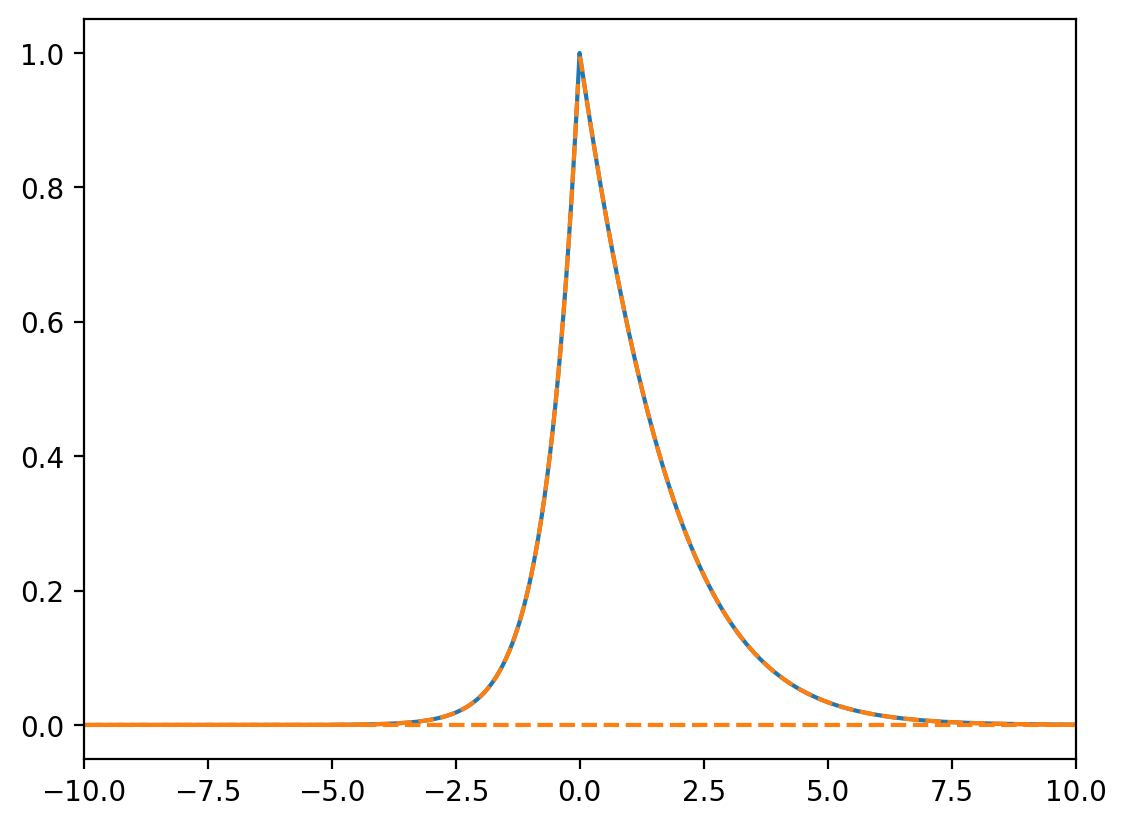

In [49]:
len_ = 1000000
spe_wid = 10
w = np.linspace(-spe_wid, spe_wid, len_)

sigma = 1
jw = gen_jw(w)
jw1 = jw / (1 - np.exp(-beta * w))
# plt.plot(w, jw)
plt.plot(w, jw1)
fft_ct[0] = fft_ct[0] / 2
plt.plot(2 * np.pi * np.fft.fftfreq(len(fft_ct), fft_t[1] - fft_t[0]),
         len(fft_ct) * (fft_t[1] - fft_t[0]) * np.fft.ifft(fft_ct), '--')
plt.xlim(-10, 10)
fft_ct[0] = fft_ct[0] * 2

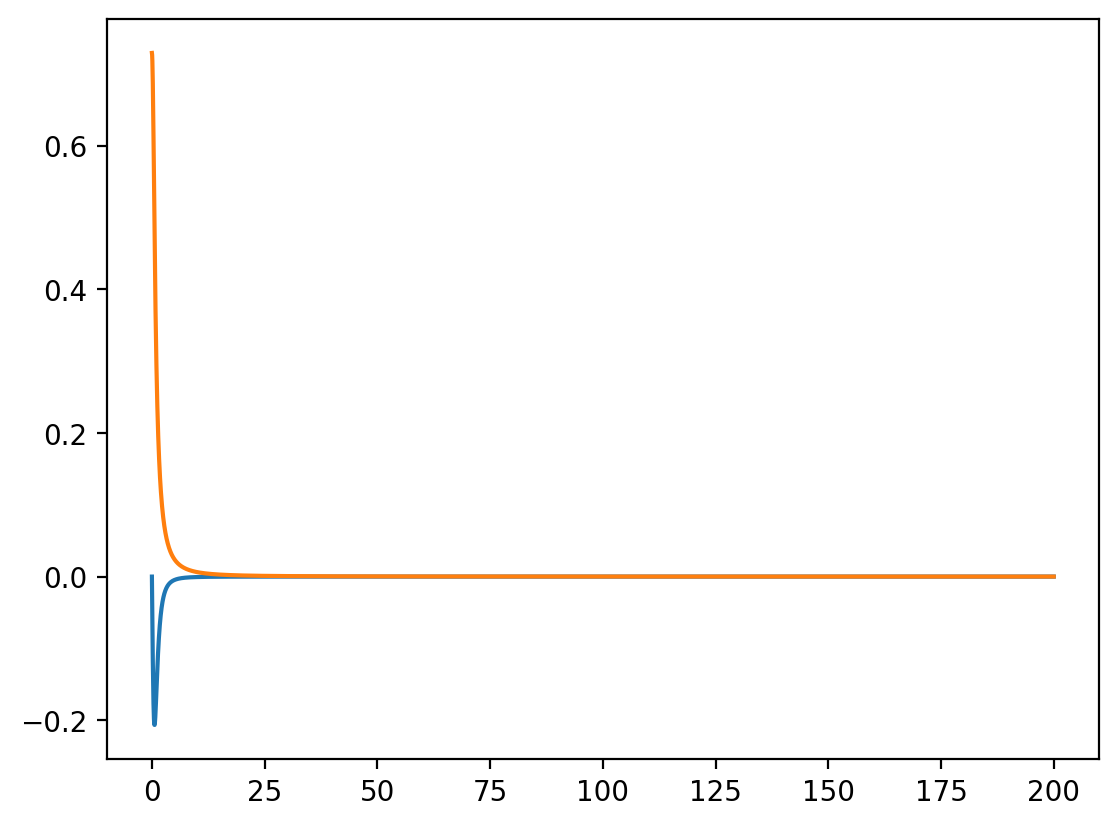

[0.72887724+0.j         0.72610711-0.03167243j 0.71791814-0.06240758j
 0.70466254-0.09133658j 0.68688907-0.11771815j 0.66529242-0.14098154j
 0.64065401-0.16074904j 0.61378244-0.17683795j 0.58546073-0.18924488j
 0.55640498-0.19811733j]
[5.73619866e-06-7.91760137e-08j 5.72828429e-06-7.91155298e-08j
 5.72037596e-06-7.90551061e-08j 5.71247366e-06-7.89947425e-08j
 5.70457741e-06-7.89344390e-08j 5.69668717e-06-7.88741956e-08j
 5.68880296e-06-7.88140120e-08j 5.68092477e-06-7.87538884e-08j
 5.67305258e-06-7.86938244e-08j 5.66518640e-06-7.86338202e-08j]


In [50]:
plt.plot(fft_t, np.imag(fft_ct))
plt.plot(fft_t, np.real(fft_ct))
# plt.xlim(0, 10)
plt.show()
print(fft_ct[:10])
print(fft_ct[-10:])

In [51]:
res_t = fft_ct.copy()
print(res_t[-10:])
n_sample = n
print(len(t), n_sample)
h = res_t
H_r = np.zeros((n_sample, n_sample))
H_i = np.zeros((n_sample, n_sample))
for i in range(n_sample):
    H_r[i, :] = np.real(h[i:n_sample + i])
    H_i[i, :] = np.imag(h[i:n_sample + i])    

[5.73619866e-06-7.91760137e-08j 5.72828429e-06-7.91155298e-08j
 5.72037596e-06-7.90551061e-08j 5.71247366e-06-7.89947425e-08j
 5.70457741e-06-7.89344390e-08j 5.69668717e-06-7.88741956e-08j
 5.68880296e-06-7.88140120e-08j 5.68092477e-06-7.87538884e-08j
 5.67305258e-06-7.86938244e-08j 5.66518640e-06-7.86338202e-08j]
4001 2000


In [52]:
sing_vs_r, Q_r = LA.eigh(H_r)
sing_vs_i, Q_i = LA.eigh(H_i)
phase_mat_r = np.diag(
    [np.exp(-1j * np.angle(sing_v_r) / 2.0) for sing_v_r in sing_vs_r])
vs_r = np.array([np.abs(sing_v_r) for sing_v_r in sing_vs_r])
Qp_r = np.dot(Q_r, phase_mat_r)
sort_array = np.argsort(vs_r)[::-1]
vs_r = vs_r[sort_array]
Qp_r = Qp_r[:, sort_array]

phase_mat_i = np.diag(
    [np.exp(-1j * np.angle(sing_v_i) / 2.0) for sing_v_i in sing_vs_i])
vs_i = np.array([np.abs(sing_v_i) for sing_v_i in sing_vs_i])
Qp_i = np.dot(Q_i, phase_mat_i)
sort_array = np.argsort(vs_i)[::-1]
vs_i = vs_i[sort_array]
Qp_i = Qp_i[:, sort_array]

print(
    "error of decompose",
    np.sum(
        np.abs(H_r -
               np.dot(np.dot(Qp_r, np.diag(vs_r)), (np.transpose(Qp_r))))))
print(vs_r[:10])

print(
    "error of decompose",
    np.sum(
        np.abs(H_i -
               np.dot(np.dot(Qp_i, np.diag(vs_i)), (np.transpose(Qp_i))))))
print(vs_i[:10])

error of decompose 1.7530496372703413e-11
[9.12436704e+00 1.11764276e+00 2.42030197e-01 2.28764666e-01
 5.66598386e-02 1.84910461e-02 6.76379858e-03 1.56162382e-03
 5.60623658e-04 2.70432123e-04]
error of decompose 3.080031373705243e-11
[3.70775136e+00 7.31197046e-01 1.44712455e-01 4.63051612e-02
 1.03548833e-02 2.82096268e-03 1.91692286e-03 4.38996374e-04
 1.57024930e-04 6.96382677e-05]


len of gamma 3
3
len of gamma 3
3
     pcost       dcost       gap    pres   dres
 0: -3.1235e-01 -1.5458e+01  8e+03  9e+01  6e+01
 1:  3.2342e+01 -6.9647e+02  2e+03  2e+01  1e+01
 2:  1.6446e+02 -2.7799e+02  6e+02  1e+00  1e+00
 3:  3.2786e+01 -5.2990e+01  1e+02  1e-01  9e-02
 4:  1.6406e+01 -3.1843e+01  6e+01  8e-02  5e-02
 5: -8.2558e-01 -8.3784e+00  8e+00  3e-03  2e-03
 6: -3.5162e+00 -4.6782e+00  1e+00  1e-04  7e-05
 7: -3.9314e+00 -4.0863e+00  2e-01  5e-15  1e-14
 8: -3.9839e+00 -4.0051e+00  2e-02  4e-15  1e-13
 9: -3.9913e+00 -3.9936e+00  2e-03  4e-15  9e-14
10: -3.9921e+00 -3.9927e+00  6e-04  3e-15  1e-13
11: -3.9921e+00 -3.9927e+00  6e-04  4e-15  1e-13
12: -3.9922e+00 -3.9926e+00  5e-04  4e-15  9e-14
13: -3.9923e+00 -3.9924e+00  1e-04  3e-15  4e-14
14: -3.9923e+00 -3.9924e+00  1e-04  4e-15  3e-14
15: -3.9923e+00 -3.9924e+00  6e-05  3e-15  6e-15
16: -3.9923e+00 -3.9923e+00  2e-05  4e-15  2e-15
17: -3.9923e+00 -3.9923e+00  4e-06  4e-15  5e-16
18: -3.9923e+00 -3.9923e+00  2e-06  

/tmp/ipykernel_60179/1512685372.py:83: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(w, phixx / (1 - np.exp(-beta * w)),


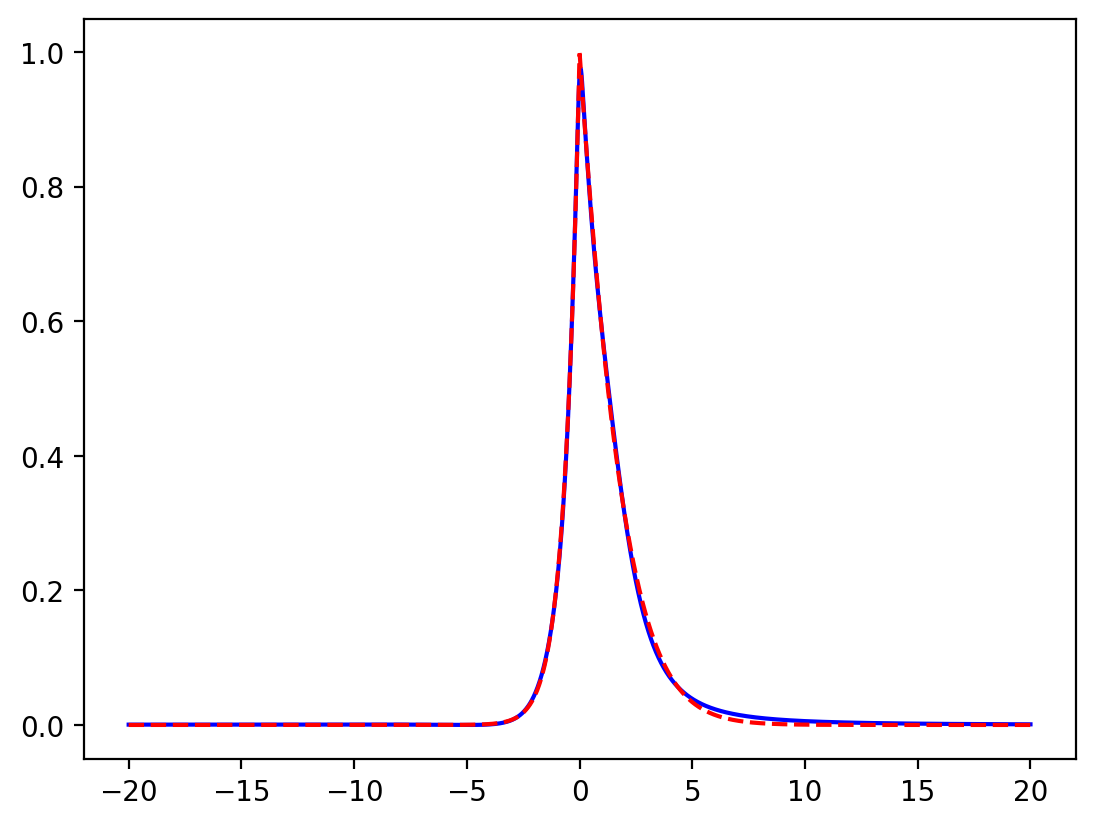

len of gamma 4
4
len of gamma 3
3
     pcost       dcost       gap    pres   dres
 0: -2.6096e-01 -1.9497e+01  8e+03  9e+01  6e+01
 1:  8.1014e+01 -2.0242e+02  4e+02  3e+00  2e+00
 2:  1.4199e+01 -2.6956e+01  4e+01  3e-02  2e-02
 3: -1.2249e+00 -7.6709e+00  7e+00  1e-03  6e-04
 4: -3.5943e+00 -4.5490e+00  1e+00  3e-05  2e-05
 5: -3.9434e+00 -4.0733e+00  1e-01  6e-15  1e-14
 6: -3.9874e+00 -4.0059e+00  2e-02  4e-15  6e-14
 7: -3.9932e+00 -3.9955e+00  2e-03  4e-15  3e-13
 8: -3.9933e+00 -3.9950e+00  2e-03  4e-15  4e-13
 9: -3.9937e+00 -3.9939e+00  2e-04  4e-15  3e-13
10: -3.9937e+00 -3.9939e+00  2e-04  4e-15  3e-13
11: -3.9937e+00 -3.9938e+00  9e-05  4e-15  9e-13
12: -3.9937e+00 -3.9937e+00  2e-05  4e-15  1e-12
13: -3.9937e+00 -3.9937e+00  2e-05  4e-15  1e-12
14: -3.9937e+00 -3.9937e+00  1e-05  4e-15  5e-13
15: -3.9937e+00 -3.9937e+00  3e-06  4e-15  5e-13
16: -3.9937e+00 -3.9937e+00  2e-06  4e-15  2e-13
17: -3.9937e+00 -3.9937e+00  2e-07  4e-15  2e-14
18: -3.9937e+00 -3.9937e+00  6e-08  

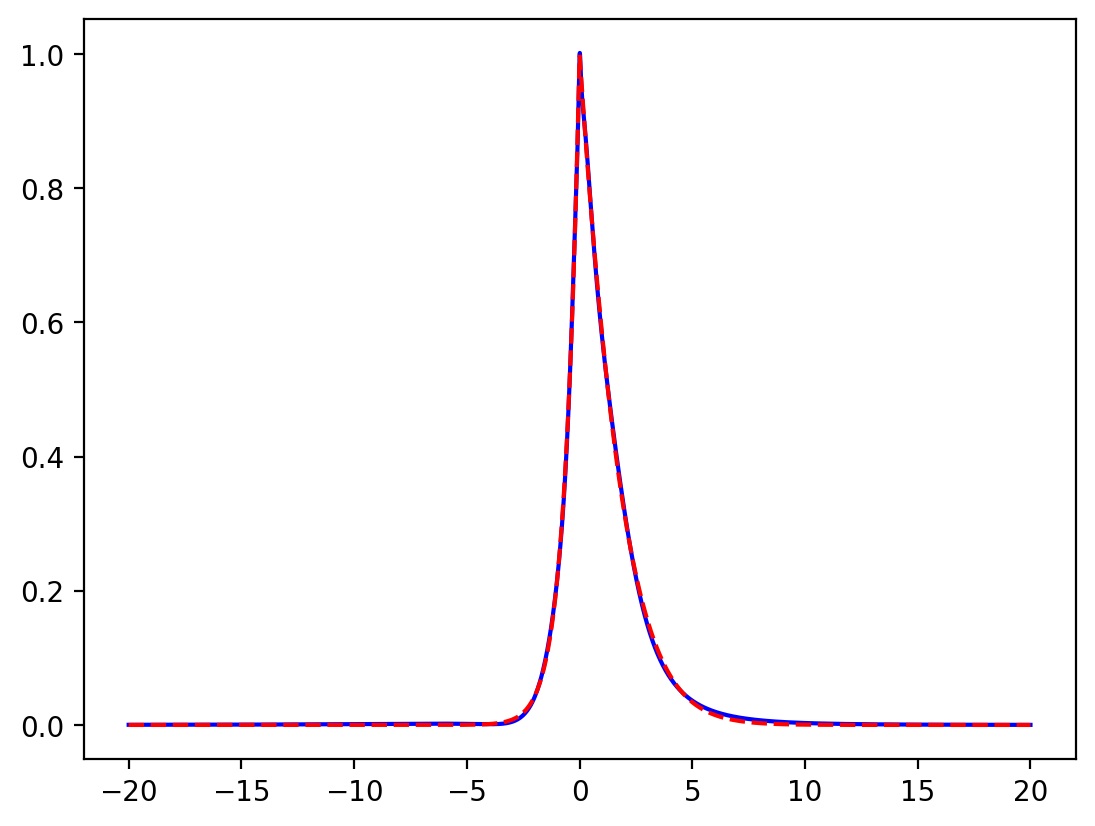

len of gamma 4
4
len of gamma 4
4
     pcost       dcost       gap    pres   dres
 0: -2.7294e-01 -1.9519e+01  8e+03  9e+01  5e+01
 1:  7.1920e+01 -2.5258e+02  5e+02  4e+00  3e+00
 2:  1.6298e+01 -3.0125e+01  5e+01  4e-02  3e-02
 3: -7.3693e-01 -8.3961e+00  8e+00  2e-03  1e-03
 4: -3.5323e+00 -4.6343e+00  1e+00  4e-05  2e-05
 5: -3.9260e+00 -4.0920e+00  2e-01  1e-06  8e-07
 6: -3.9859e+00 -4.0085e+00  2e-02  8e-15  3e-13
 7: -3.9935e+00 -3.9964e+00  3e-03  4e-15  1e-13
 8: -3.9944e+00 -3.9948e+00  4e-04  4e-15  1e-13
 9: -3.9945e+00 -3.9946e+00  1e-04  3e-15  4e-14
10: -3.9945e+00 -3.9946e+00  1e-04  4e-15  4e-14
11: -3.9945e+00 -3.9946e+00  7e-05  4e-15  8e-14
12: -3.9946e+00 -3.9946e+00  1e-05  4e-15  4e-14
13: -3.9946e+00 -3.9946e+00  1e-05  4e-15  2e-14
14: -3.9946e+00 -3.9946e+00  1e-05  4e-15  2e-14
15: -3.9946e+00 -3.9946e+00  4e-06  4e-15  1e-14
16: -3.9946e+00 -3.9946e+00  1e-06  4e-15  2e-14
17: -3.9946e+00 -3.9946e+00  1e-06  4e-15  1e-14
18: -3.9946e+00 -3.9946e+00  3e-07  

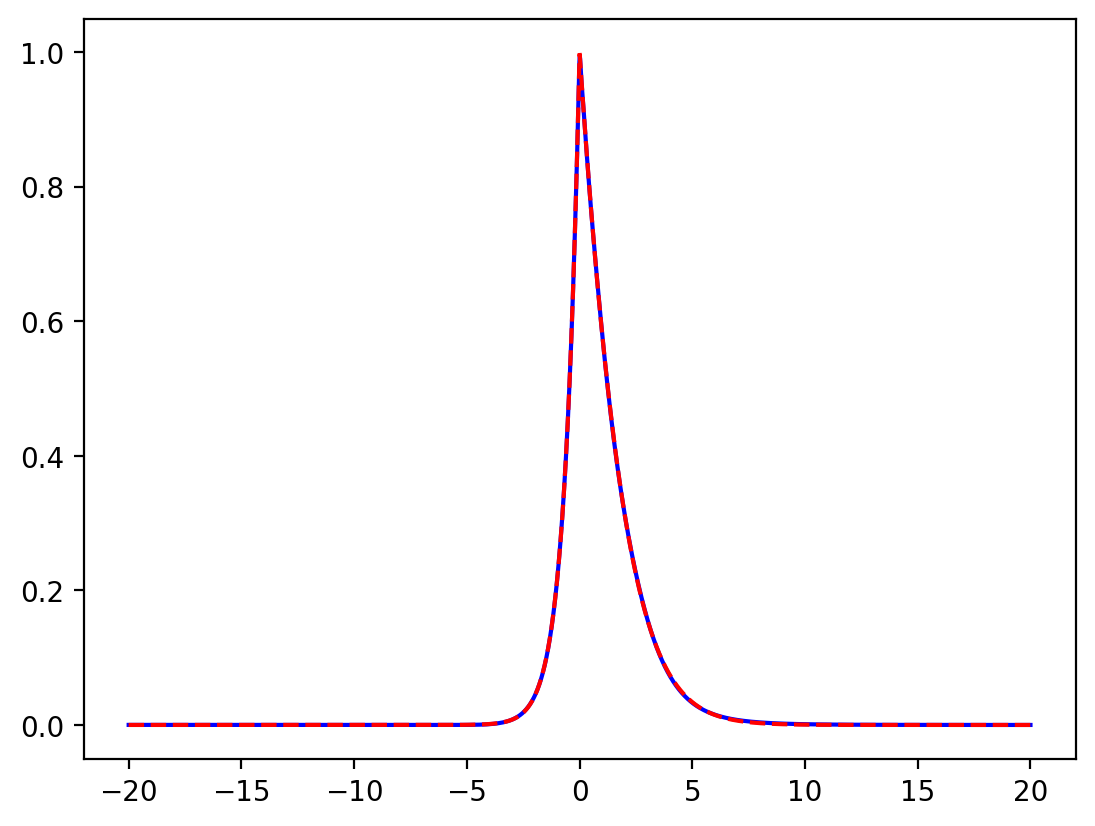

<Figure size 640x480 with 0 Axes>

In [54]:
for n_gamma_r, n_gamma_i in ([3,3], [4,3], [4,4]):
    print("len of gamma", n_gamma_r)
    for i in [n_gamma_r]:
        print(i)
        gamma_r = np.roots(Qp_r[:,i][::-1])
    gamma_new_r = gamma_r[np.argsort(np.abs(gamma_r))[:n_gamma_r]]
    t_new_r = 2*n*np.log(gamma_new_r)
    
    print("len of gamma", n_gamma_i)
    for i in [n_gamma_i]:
        print(i)
        gamma_i = np.roots(Qp_i[:,i][::-1])
    gamma_new_i = gamma_i[np.argsort(np.abs(gamma_i))[:n_gamma_i]]
    t_new_i = 2*n*np.log(gamma_new_i)
    
    gamma_new = np.append(gamma_new_r, gamma_new_i)
    t_new = np.append(t_new_r, t_new_i)
    n_gamma = n_gamma_r + n_gamma_i
    
    n_col = n_sample*2+1
    n_row = n_gamma
    gamma_m = np.zeros((2 * n_col, 2 * n_row), dtype=float)
    for i in range(n_row):
        for j in range(n_col):
            gamma_m[j, i] = np.real(gamma_new[i]**j)
            gamma_m[n_col + j, n_row + i] = np.real(gamma_new[i]**j)
            gamma_m[j, n_row + i] = -np.imag(gamma_new[i]**j)
            gamma_m[n_col + j, i] = np.imag(gamma_new[i]**j)
    h_m = np.append(np.real(h), np.imag(h))

    # freq_d = np.linspace(-1000, 1000, 2 * n_col)
    freq_d = np.append(np.append(np.linspace(-10000, 10, n_col//2), np.linspace(-10, 10, n_col + 1)), np.linspace(10, 10000, n_col//2))

    freq_m = np.zeros((2 * n_col, 2 * n_row), dtype=float)
    expn = -t_new / scale
    for i in range(n_row):
        for j in range(2 * n_col):
            freq_m[j, i] = np.real(expn[i]) / (np.real(expn[i])**2 + (np.imag(expn[i]) - freq_d[j])**2)
            freq_m[j, n_row + i] = (np.imag(expn[i]) - freq_d[j]) / (np.real(expn[i])**2 + (np.imag(expn[i]) - freq_d[j])**2)

    C = numpy_to_cvxopt_matrix(gamma_m)
    d = numpy_to_cvxopt_matrix(h_m)
    A = numpy_to_cvxopt_matrix(-freq_m)
    b = numpy_to_cvxopt_matrix(np.zeros(2 * n_col))
    Q = C.T * C
    q = - d.T * C

    opts = {'show_progress': True, 'abstol': 1e-24, 'reltol': 1e-24, 'feastol': 1e-24}
    for k, v in opts.items():
        solvers.options[k] = v
    sol = solvers.qp(Q, q.T, A, b, None, None, None, None)
    
    omega_new_temp = np.array(sol['x']).reshape(2, n_gamma)
    omega_new = omega_new_temp[0,:] + 1.j*omega_new_temp[1,:]
    print(omega_new)

    etal_p = omega_new
    expn_p = -t_new / scale
    
    etal = omega_new.copy()
    etar = np.conjugate(omega_new)
    etaa = np.abs(omega_new)
    expn = -t_new / scale

    len_ = 10000
    spe_wid = 20

    w = np.append(np.linspace(-spe_wid, 0, len_),np.linspace(0, spe_wid, len_))

    w_sp, lamd_sp, gams_sp, beta_sp = sp.symbols(
        r"\omega , \lambda, \gamma, \beta", real=True)

    phixx = w * lams1 * np.exp(- gams1 * np.abs(w))
    res_J = np.zeros(len(w),dtype=complex)
    fit_J(w, res_J, expn, etal)

    plt.plot(w, res_J.real,
             'b',
             label='phixx')
    plt.plot(w, phixx / (1 - np.exp(-beta * w)),
             'r--',
             label='phixx')
    plt.show()
    plt.clf()
    
    np.savetxt("./ohmic-boson/expn-{}".format(len(expn)), expn)
    np.savetxt("./ohmic-boson/etal-{}".format(len(etal)), etal)
